In [ ]:
!pip install pytorch-tabnet --quiet
!pip install wget --quiet
!pip install pytorch-tabnet optuna
from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import wget
from google.colab import drive
drive.mount('/content/drive')
from typing import Optional, Union, Tuple
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import accuracy_score
import pandas as pd
def get_labels(x: pd.Series) -> pd.Series:
    labels, _ = pd.factorize(x)
    return pd.Series(labels, name=x.name, index=x.index)
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
from pytorch_tabnet.augmentations import RegressionSMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from torchvision import datasets, transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import filterfalse
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
import optuna
import warnings

# 1. Deshabilitar el logging de Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 2. Suprimir advertencias específicas
warnings.filterwarnings("ignore", category=UserWarning)  # Para advertencias de PyTorch TabNet o de otros módulos
warnings.filterwarnings("ignore", category=FutureWarning)  # Para advertencias futuras como 'suggest_loguniform'
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
#export CUDA_LAUNCH_BLOCKING=1

def my_mse_loss_fn(y_pred, y_true):
    """
    Dummy example similar to using default torch.nn.functional.mse_loss
    """
    mse_loss = (y_true - y_pred) ** 2
    return torch.mean(mse_loss)
def my_rmse_loss_fn(y_pred, y_true):
    """
    Función de pérdida que calcula el RMSE entre la predicción y el valor verdadero.
    """
    mse_loss = (y_true - y_pred) ** 2
    mean_mse_loss = torch.mean(mse_loss)
    rmse_loss = torch.sqrt(mean_mse_loss)
    return rmse_loss
def my_mae_loss_fn(y_pred, y_true):
    """
    Calcula el error absoluto medio (Mean Absolute Error, MAE) entre las predicciones y los valores reales.
    Similar al uso de torch.nn.functional.l1_loss.
    """
    mae_loss = torch.abs(y_true - y_pred)
    return torch.mean(mae_loss)
def my_mape_loss_fn(y_pred, y_true):
    """
    Calcula el error porcentual absoluto medio (Mean Absolute Percentage Error, MAPE).
    """
    epsilon = 1e-8  # Evita divisiones por cero
    percentage_error = torch.abs((y_true - y_pred) / (y_true + epsilon))
    mape_loss = torch.mean(percentage_error) * 100
    return mape_loss

def my_r2_score_fn(y_pred, y_true):
    """
    Calcula el coeficiente de determinación R².
    """
    total_variance = torch.var(y_true, unbiased=False)  # Varianza total
    unexplained_variance = torch.mean((y_true - y_pred) ** 2)  # Varianza no explicada (MSE)
    r2_score = 1 - (unexplained_variance / total_variance)
    return -r2_score
def my_log_cosh_loss_fn(y_pred, y_true):
    """
    Calcula la pérdida log-cosh.
    """
    log_cosh_loss = torch.log(torch.cosh(y_true - y_pred))
    return torch.mean(log_cosh_loss)

def my_huber_loss_fn(y_pred, y_true, delta=1.0):
    """
    Calcula la pérdida Huber.
    """
    abs_error = torch.abs(y_true - y_pred)
    quadratic = torch.minimum(abs_error, torch.tensor(delta))
    linear = abs_error - quadratic
    huber_loss = 0.5 * quadratic ** 2 + delta * linear
    return torch.mean(huber_loss)

def my_msle_loss_fn(y_pred, y_true):
    """
    Calcula el error cuadrático medio logarítmico (MSLE).
    """
    epsilon = 1e-8  # Evita logaritmos de cero
    log_diff = torch.log1p(y_pred + epsilon) - torch.log1p(y_true + epsilon)
    msle_loss = torch.mean(log_diff ** 2)
    return msle_loss

def my_r2_score_fn(y_pred, y_true):
    """
    Calcula el coeficiente de determinación R².
    """
    total_variance = torch.var(y_true, unbiased=False)
    unexplained_variance = torch.mean((y_true - y_pred) ** 2)
    r2_score = 1 - (unexplained_variance / total_variance)
    return -r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 7.5 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Cargar datos
Xdata = pd.read_csv('/content/drive/Shareddrives/CHEC/data_chec/datos/Data_Total/SuperEventos.csv')

# Eliminar columnas que no se utilizarán
Xdata.drop(['evento', 'fin','cnt_usus', 'inicio','duracion_h', 'SAIFI', 'LATITUD', 'LONGITUD', 'FECHA'], inplace=True, axis=1)

# Definir la variable target y eliminarla del conjunto de características
target = 'SAIDI'
y1 = Xdata[target].values.reshape(-1, 1)
Xdata.drop(target, axis=1, inplace=True)
df = Xdata.copy()

# Identificar columnas numéricas y categóricas
NUMERIC_COLUMNS = df.select_dtypes(include=['number']).columns.tolist()
CATEGORICAL_COLUMNS = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Rellenar valores faltantes
# Para numéricos: valor muy alto (3 veces el máximo de cada columna)
# Para categóricos: "no aplica"
for col in NUMERIC_COLUMNS:
    max_value = df[col].max()
    df[col].fillna(-10 * max_value, inplace=True)

for col in CATEGORICAL_COLUMNS:
    df[col].fillna("no aplica", inplace=True)

# Codificar variables categóricas y obtener sus dimensiones
categorical_dims = {}
for col in CATEGORICAL_COLUMNS:
    l_enc = LabelEncoder()
    df[col] = l_enc.fit_transform(df[col].astype(str))
    categorical_dims[col] = len(l_enc.classes_)

# Crear lista de características
unused_feat = []
features = [col for col in df.columns if col not in unused_feat + [target]]

# Obtener índices y dimensiones de variables categóricas


# Preparar datos
X = df[features].values.astype('float32')
y = y1.astype('float32')

# Escalar la variable objetivo
scaler = StandardScaler()  # MinMaxScaler()
y_scaled = y  # scaler.fit_transform(y)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

a1 = np.array([1e-12, 1e-6, 1e-3, 1e-1, 1e0, 1e1])
a2 = np.array([2, 4, 8, 16, 32, 64, 128, 256])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168225 entries, 0 to 168224
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   equipo_ope                  168225 non-null  int64  
 1   tipo_equi_ope               168225 non-null  int64  
 2   cto_equi_ope                168225 non-null  int64  
 3   tipo_elemento               168225 non-null  int64  
 4   tipo_duracion               168225 non-null  int64  
 5   causa                       168225 non-null  int64  
 6   CNT_TRAFOS_AFEC             168225 non-null  int64  
 7   ASSEMBLY                    168225 non-null  int64  
 8   PHASES                      168225 non-null  float64
 9   FPARENT                     168225 non-null  int64  
 10  KV                          168225 non-null  float64
 11  STATE                       168225 non-null  int64  
 12  LINESECTIO                  168225 non-null  int64  
 13  DEP           

# Generación datos

In [ ]:
def objective_regression(trial):
    # Sugerir hiperparámetros
    n_d = trial.suggest_int('n_d', 2, 512)
    n_a = trial.suggest_int('n_a', 20, 512)
    n_steps = trial.suggest_int('n_steps', 3, 5)
    gamma = trial.suggest_loguniform('gamma', 1e-12,1e1)
    lambda_sparse = trial.suggest_loguniform('lambda_sparse', 1e-12, 1e1)
    batch_size = trial.suggest_categorical('batch_size', [1024,4096,2048])
    p=trial.suggest_float('p',1e-4,0.9)
    aug = RegressionSMOTE(p=p)
    mask_type=trial.suggest_categorical('mask_type',['entmax','sparsemax'])
    emb = trial.suggest_int('emb',1,50)
    cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
    cat_dims = [categorical_dims[f] for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
    cat_emb_dim = [min(emb, (dim + 1) // 2) for dim in cat_dims]
    # Crear el modelo TabNet para regresión
    model = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=cat_emb_dim,cat_idxs=cat_idxs,
                            n_d=n_d, n_a=n_a, n_steps=n_steps, gamma=gamma,
                            lambda_sparse=lambda_sparse,verbose=False,mask_type=mask_type)
    model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['mae'],
    loss_fn=my_mae_loss_fn,
    max_epochs=70,
    patience=50,
    batch_size=batch_size, virtual_batch_size=batch_size//2,
    num_workers=0,
    drop_last=False,
    augmentations=aug,
    )
    # Evaluación
    rmse = model.history['valid_mae'][-1]
    return rmse
# Crear el estudio y optimizar
study_class = optuna.create_study(direction='minimize',sampler=optuna.samplers.TPESampler())
study_class.optimize(objective_regression, n_trials=10)
# Resultados
print("Best hyperparameters for regression: ", study_class.best_params)
print("Best mae: ", study_class.best_value)


Early stopping occurred at epoch 62 with best_epoch = 12 and best_valid_mae = 5.213940143585205

Early stopping occurred at epoch 58 with best_epoch = 8 and best_valid_mae = 5.168499946594238

Early stopping occurred at epoch 61 with best_epoch = 11 and best_valid_mae = 5.200570106506348

Early stopping occurred at epoch 56 with best_epoch = 6 and best_valid_mae = 5.16225004196167

Early stopping occurred at epoch 64 with best_epoch = 14 and best_valid_mae = 5.139009952545166

Early stopping occurred at epoch 57 with best_epoch = 7 and best_valid_mae = 5.125239849090576

Early stopping occurred at epoch 53 with best_epoch = 3 and best_valid_mae = 5.1793999671936035
Stop training because you reached max_epochs = 70 with best_epoch = 27 and best_valid_mae = 5.175419807434082
Stop training because you reached max_epochs = 70 with best_epoch = 67 and best_valid_mae = 5.138339996337891
Stop training because you reached max_epochs = 70 with best_epoch = 67 and best_valid_mae = 5.51937007904

In [ ]:
study_class.best_params

{'n_d': 238,
 'n_a': 152,
 'n_steps': 4,
 'gamma': 2.630139065528412e-07,
 'lambda_sparse': 1.6729103627466297e-10,
 'batch_size': 2048,
 'p': 0.5064196927907495,
 'mask_type': 'sparsemax',
 'emb': 1}

# Variabilidad

In [ ]:
# Parámetros obtenidos del estudio
best_params = {
    'n_d': 194,
    'n_a': 466,
    'n_steps': 9,
    'gamma': 1.7955787627483018e-11,
    'lambda_sparse': 0.006374528779469219,
    'batch_size': 2048,
    'mask_type': 'sparsemax',
    'emb': 9,
    'momentum': 0.08567242696072505,
    'learning_rate': 0.003915993780168426,
    'weight_decay': 0.00044360712433260633,
    'scheduler_gamma': 0.3831859362333109,
    'step_size': 8,
    'virtual_batch_size': 1024,
    'optimizer_type': 'adam',
    'p': 0.3318636786571567
}

# Asignación de parámetros
n_d = best_params['n_d']
n_a = best_params['n_a']
n_steps = best_params['n_steps']
gamma = best_params['gamma']
lambda_sparse = best_params['lambda_sparse']
mask_type = best_params['mask_type']
batch_size = best_params['batch_size']
emb = best_params['emb']
p = best_params['p']
momentum = best_params['momentum']
learning_rate = best_params['learning_rate']
weight_decay = best_params['weight_decay']
scheduler_gamma = best_params['scheduler_gamma']
step_size = best_params['step_size']
virtual_batch_size = best_params['virtual_batch_size']
optimizer_type = best_params['optimizer_type']

# Definición del optimizador
if optimizer_type == 'adam':
    optimizer_fn = torch.optim.Adam
elif optimizer_type == 'sgd':
    optimizer_fn = torch.optim.SGD
else:
    raise ValueError(f"Tipo de optimizador no soportado: {optimizer_type}")

optimizer_params = {
    'lr': learning_rate,
    'weight_decay': weight_decay
}

# Definición de la técnica de aumento de datos
aug = RegressionSMOTE(p=p)

# Identificación de columnas categóricas y sus dimensiones
cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
cat_dims = [categorical_dims[f] for f in features if f in CATEGORICAL_COLUMNS]
cat_emb_dim = [min(emb, (dim + 1) // 2) for dim in cat_dims]
import torch
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Valores de lambda_sparse para iterar
lambda_values = [lambda_sparse]#[6e-6, 6e-5, 6e-4, 6e-3, 6e-2, 6e-1, 9e-1]
from pytorch_tabnet.metrics import Metric
import numpy as np

from pytorch_tabnet.metrics import Metric
import numpy as np

from pytorch_tabnet.metrics import Metric
import numpy as np

from pytorch_tabnet.metrics import Metric
import numpy as np

class R2Metric(Metric):
    def __init__(self):
        self._name = "r2"
        self._maximize = True  # Indicamos que queremos maximizar esta métrica

    def __call__(self, y_true, y_score):
        # Trabajamos directamente con arrays de NumPy
        y_true = np.asarray(y_true).reshape(-1)
        y_score = np.asarray(y_score).reshape(-1)
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_score) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2


r2_metric = R2Metric()
# Listas para guardar las máscaras y matrices de explicación de cada iteración
all_masks = []
all_explain_matrices = []

for iteration, lambda_sparse in enumerate(lambda_values):
    print(f"Iteración {iteration + 1}, lambda_sparse={lambda_sparse}")

    # Inicialización del modelo TabNetRegressor
    clf = TabNetRegressor(
        cat_dims=cat_dims,
        cat_emb_dim=cat_emb_dim,
        cat_idxs=cat_idxs,
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        mask_type=mask_type,
        optimizer_fn=optimizer_fn,
        optimizer_params=optimizer_params,
        scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        momentum=momentum,
        verbose=True
    )

    # Entrenar el modelo
    clf.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=['mae',],
        loss_fn=my_rmse_loss_fn,
        max_epochs=200,
        patience=40,
        batch_size=batch_size,
        virtual_batch_size=virtual_batch_size,
        num_workers=0,
        drop_last=False,
        augmentations=aug,
    )
    # Generar explicación
    explain_matrix, masks = clf.explain(X, normalize=True)

    # Guardar resultados
    all_masks.append(masks)  # Guardar las máscaras
    all_explain_matrices.append(explain_matrix)  # Guardar explain_matrix como array de NumPy

    # # Visualización de máscaras
    # min_val = np.min([np.min(masks[i]) for i in range(n_steps)])
    # max_val = np.max([np.max(masks[i]) for i in range(n_steps)])
    # fig, axs = plt.subplots(1, n_steps, figsize=(20, 20))
    # for i in range(n_steps):
    #     im = axs[i].imshow(masks[i], aspect='auto', cmap='viridis', vmin=min_val, vmax=max_val)
    #     axs[i].set_title(f"Mask {i + 1}", fontsize=16)
    #     axs[i].set_xlabel("Features", fontsize=14)
    #     if i == 0:
    #         axs[i].set_ylabel("Samples", fontsize=14)
    #     else:
    #         axs[i].set_yticks([])
    # cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.046, pad=0.04)
    # cbar.set_label("Values", fontsize=14)
    # plt.tight_layout()
    # plt.show()

    # # Visualización de heatmap de explain_matrix
    # plt.figure(figsize=(22, 15))
    # sns.heatmap(explain_matrix, cmap="viridis", vmin=0.0, vmax=1.0)
    # plt.title(f"Heatmap Explain Matrix (Iteración {iteration + 1})", fontsize=16)
    # plt.show()

# # Guardar las máscaras y matrices de explicación en archivos
# for i, (masks, explain_matrix) in enumerate(zip(all_masks, all_explain_matrices)):
#     # Guardar las máscaras como un archivo numpy
#     np.save(f"masks_iteration_{i+1}.npy", masks)
#     # Guardar la matriz de explicación como un archivo numpy
#     np.save(f"explain_matrix_iteration_{i+1}.npy", explain_matrix)

# print("¡Proceso completo! Las máscaras y matrices de explicación se han guardado correctamente.")

Iteración 1, lambda_sparse=0.006374528779469219


TypeError: issubclass() arg 1 must be a class

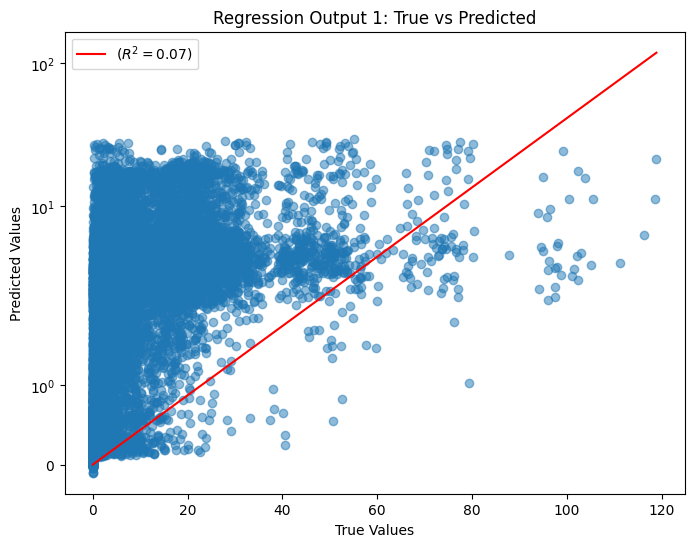

In [ ]:
from sklearn.metrics import r2_score
y_pred=clf.predict(X_test)
# Calcular el R2
r2 = r2_score(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Output 1: True vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', label=f'($R^2={r2:.2f}$)')
# Mostrar leyenda y gráfico
plt.yscale('symlog')
plt.legend()
plt.show()


In [ ]:
import numpy as np
np.load('/content/explain_matrix_iteration_1.npy').shape

(168725, 52)

In [ ]:
a=np.load('/content/masks_iteration_2.npy',allow_pickle=True)

ValueError: cannot reshape array of size 33554416 into shape (9,168725,52)

epoch 0  | loss: 5.80407 | train_mae: 9.993180274963379| valid_mae: 9.968440055847168|  0:00:19s
epoch 1  | loss: 4.81885 | train_mae: 5.715469837188721| valid_mae: 5.547239780426025|  0:00:39s
epoch 2  | loss: 4.63134 | train_mae: 5.469319820404053| valid_mae: 5.3197197914123535|  0:00:55s
epoch 3  | loss: 4.66119 | train_mae: 4.922269821166992| valid_mae: 4.775109767913818|  0:01:09s
epoch 4  | loss: 4.54007 | train_mae: 4.88454008102417| valid_mae: 4.73606014251709|  0:01:24s
epoch 5  | loss: 4.52067 | train_mae: 4.648210048675537| valid_mae: 4.496140003204346|  0:01:39s
epoch 6  | loss: 4.48063 | train_mae: 4.6041998863220215| valid_mae: 4.456639766693115|  0:01:54s
epoch 7  | loss: 4.46729 | train_mae: 4.563139915466309| valid_mae: 4.416860103607178|  0:02:09s
epoch 8  | loss: 4.4309  | train_mae: 4.531010150909424| valid_mae: 4.393280029296875|  0:02:25s
epoch 9  | loss: 4.41253 | train_mae: 4.521100044250488| valid_mae: 4.385379791259766|  0:02:40s
epoch 10 | loss: 4.41452 | tra

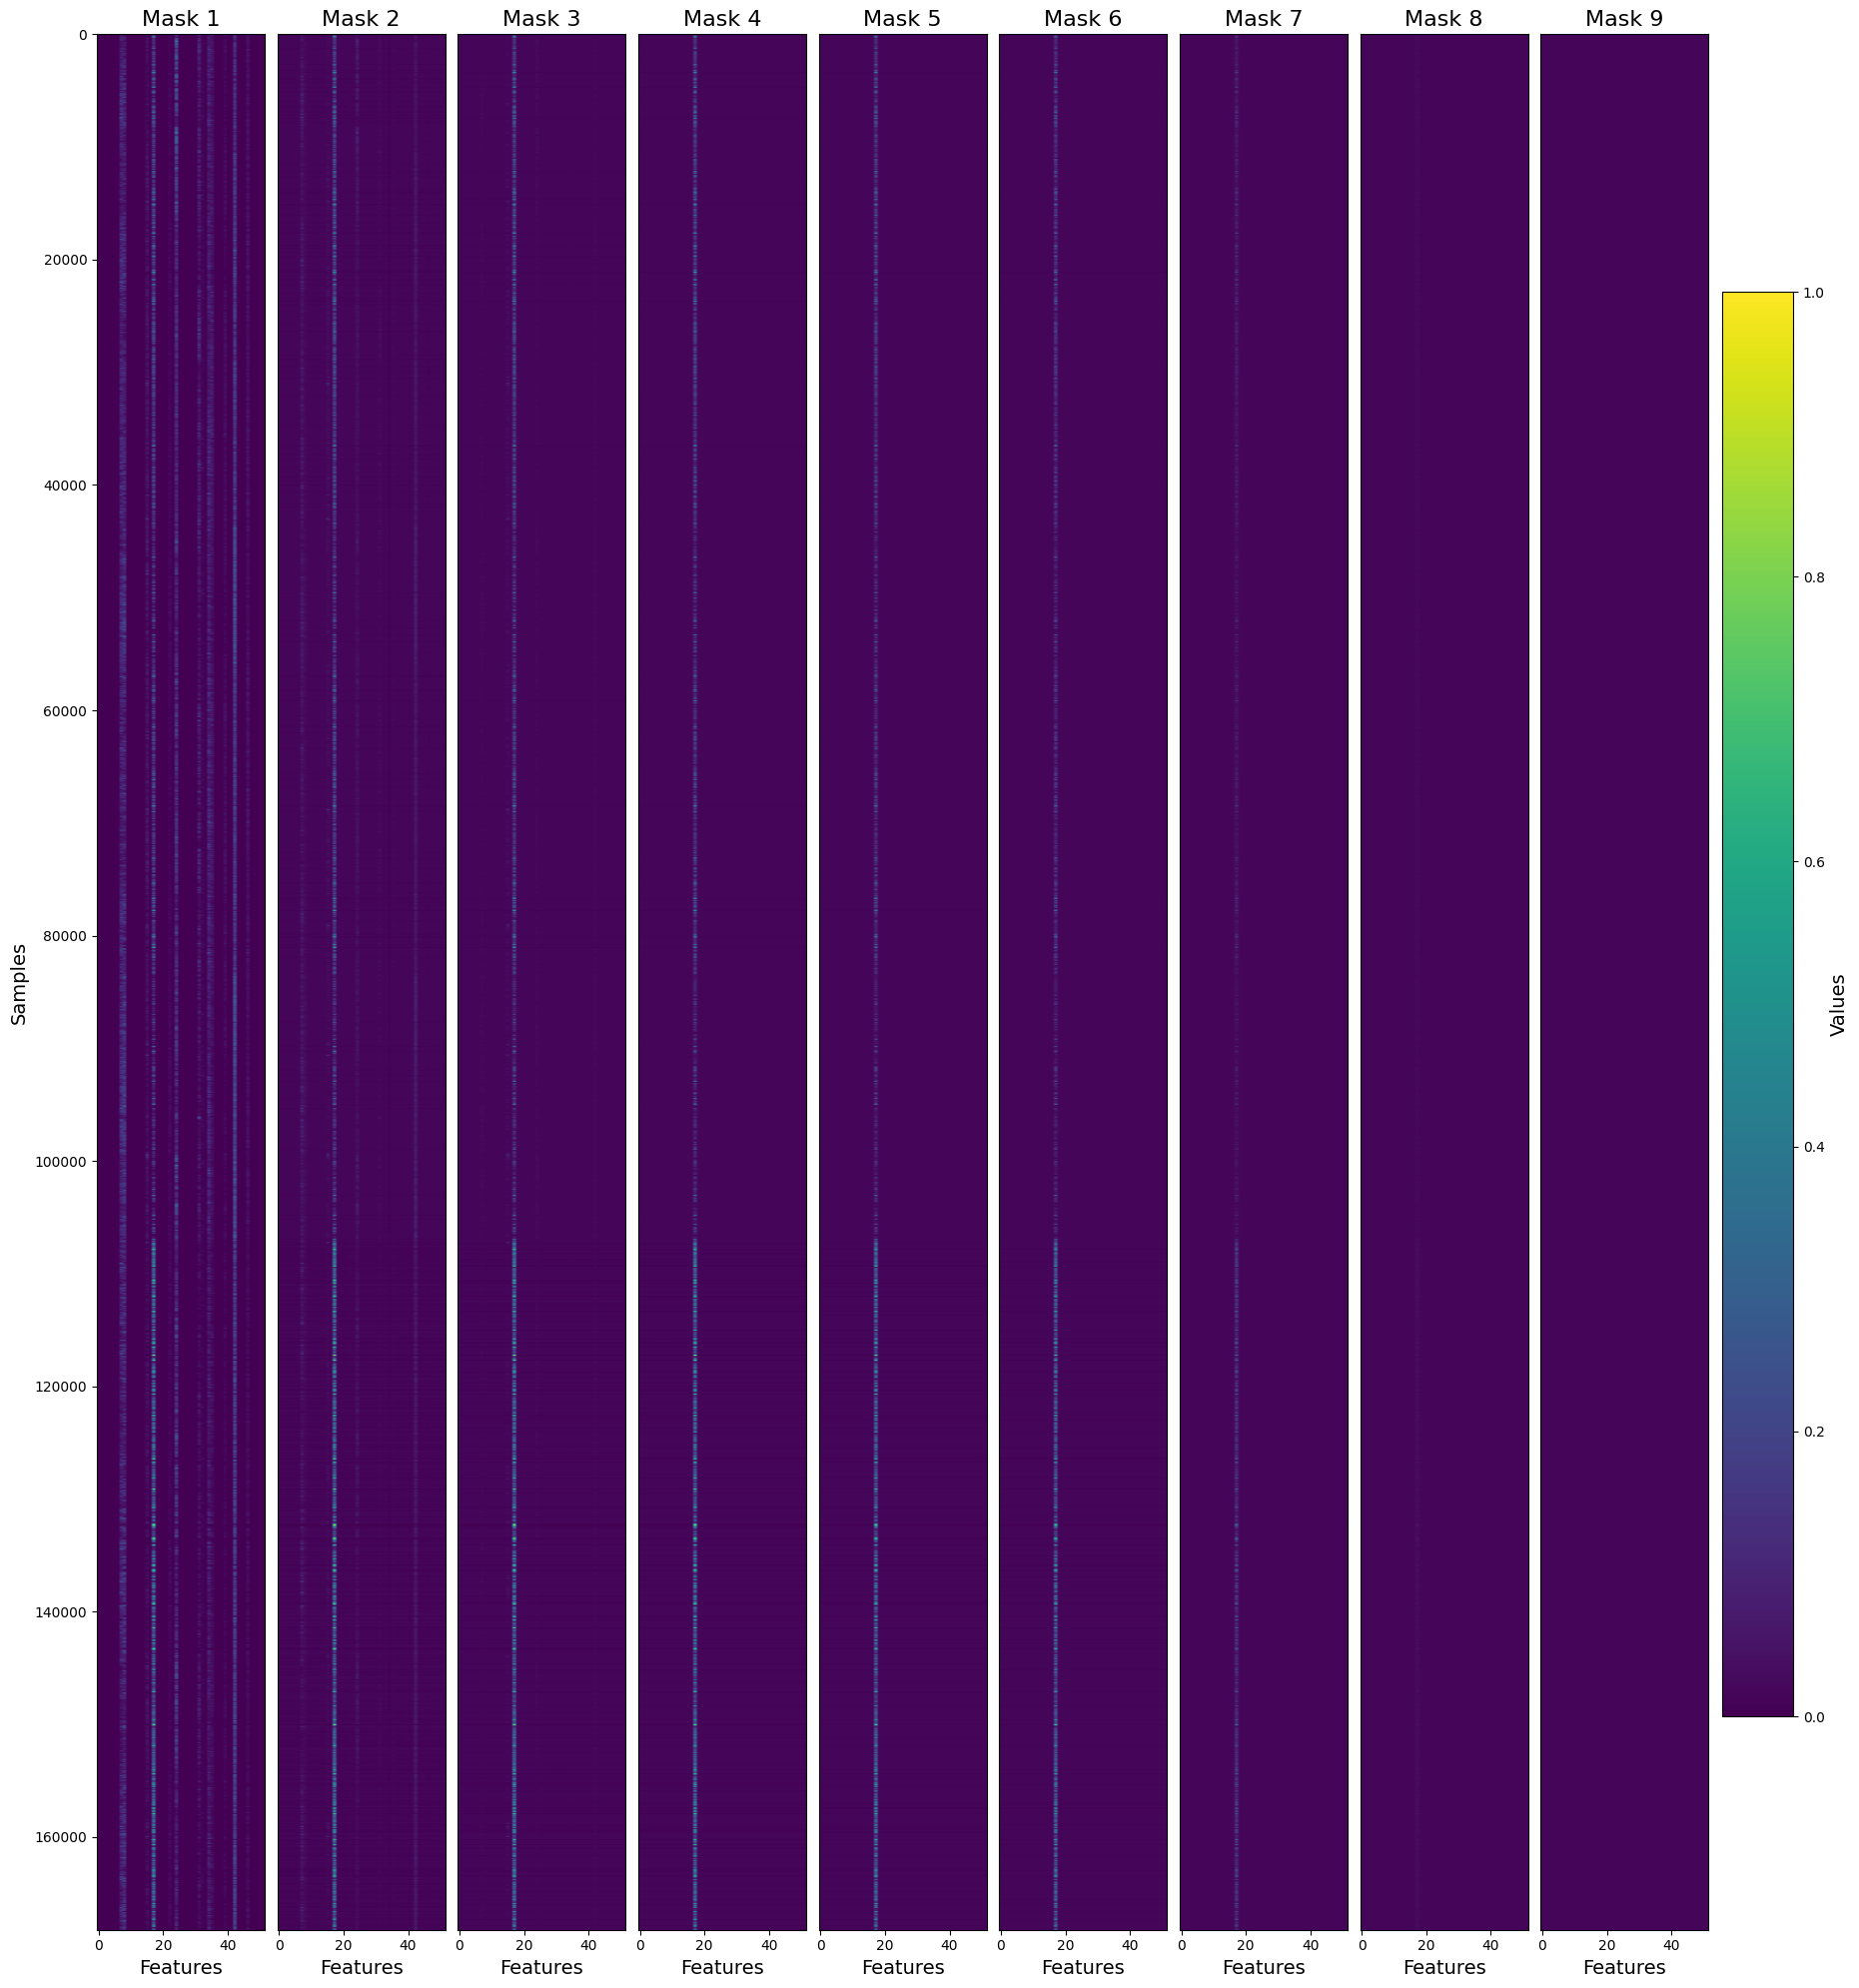

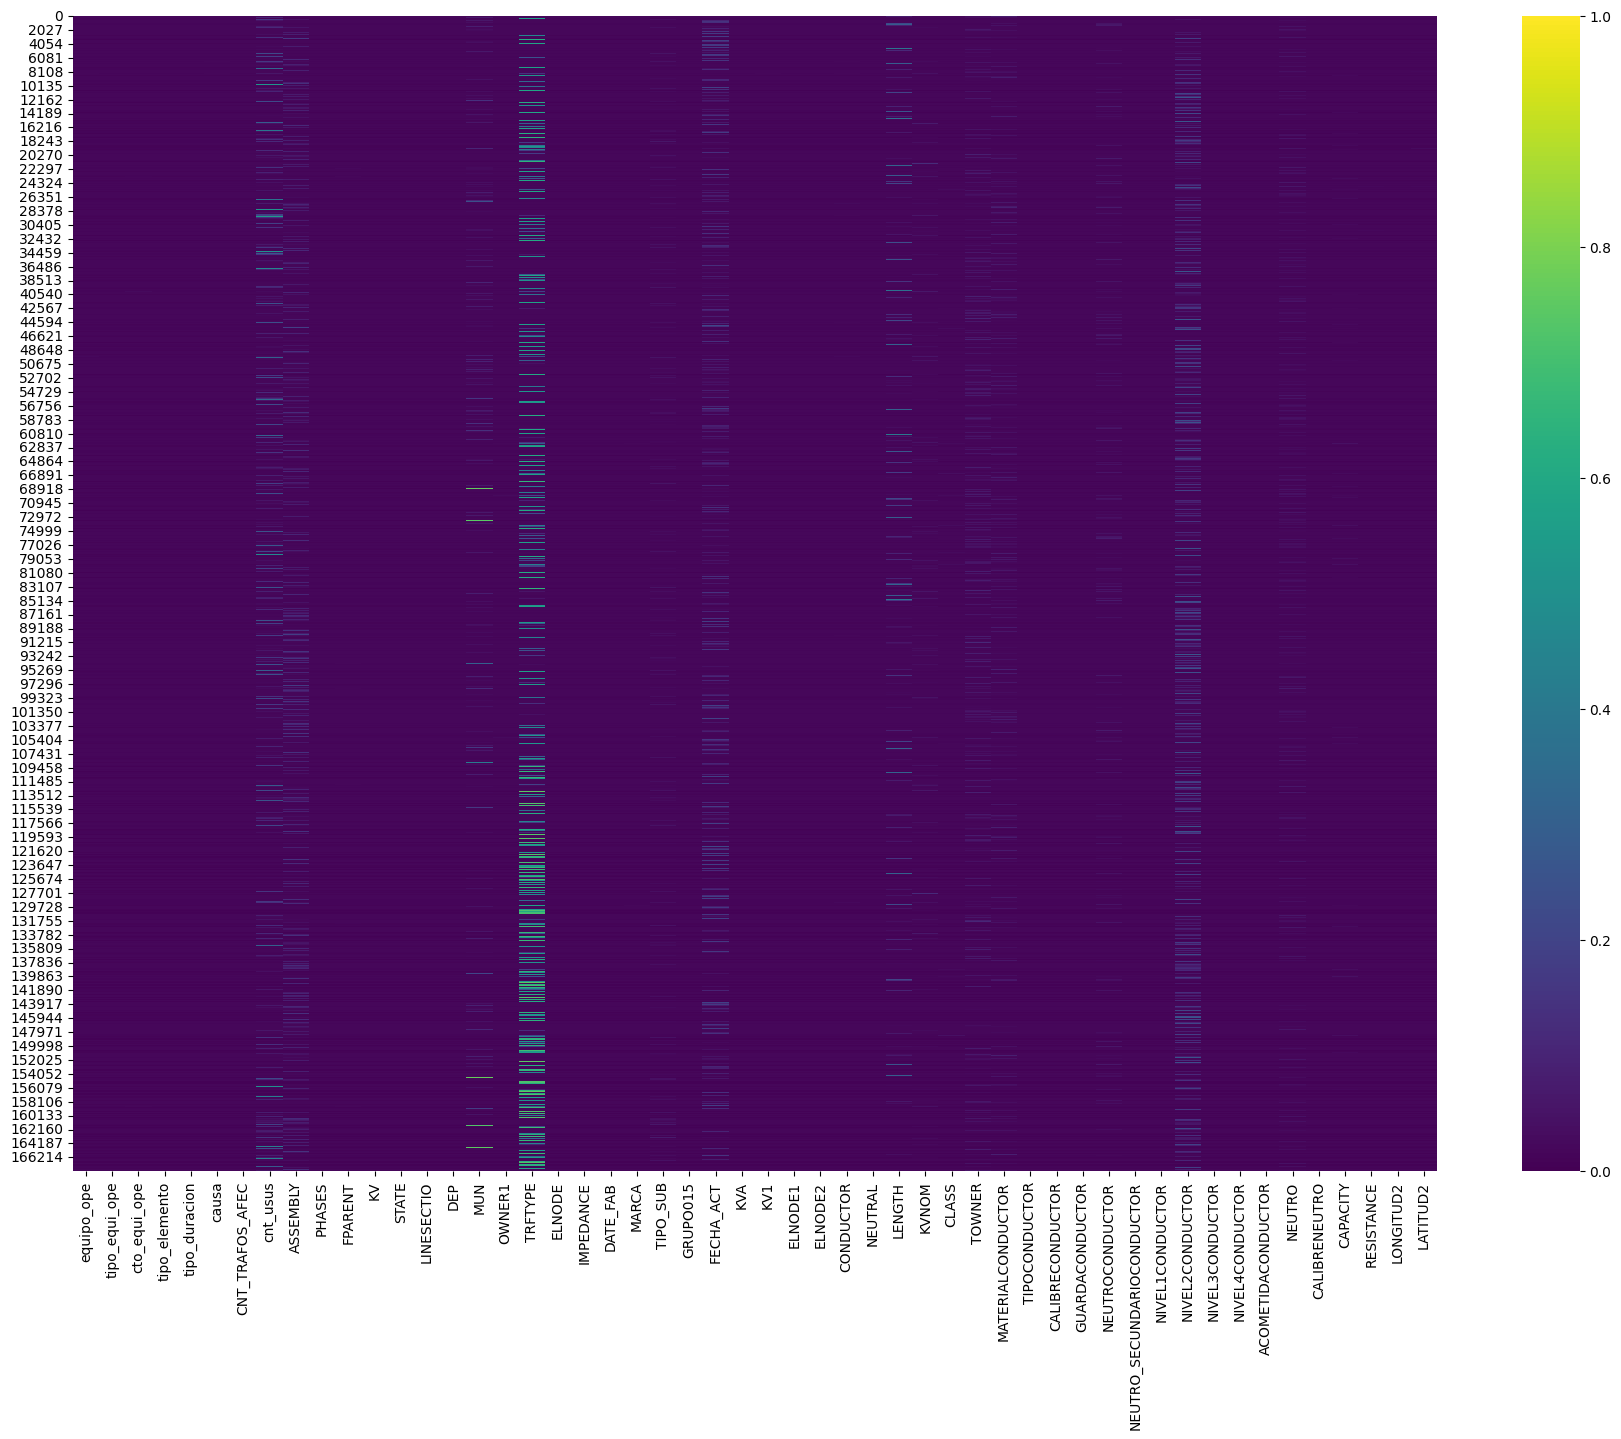

In [ ]:
# Parámetros obtenidos del estudio
best_params = {
    'n_d': 194,
    'n_a': 466,
    'n_steps': 9,
    'gamma': 1.7955787627483018e-11,
    'lambda_sparse': 0.006374528779469219,
    'batch_size': 2048,
    'mask_type': 'sparsemax',
    'emb': 9,
    'momentum': 0.08567242696072505,
    'learning_rate': 0.003915993780168426,
    'weight_decay': 0.00044360712433260633,
    'scheduler_gamma': 0.3831859362333109,
    'step_size': 8,
    'virtual_batch_size': 1024,
    'optimizer_type': 'adam',
    'p': 0.3318636786571567
}

# Asignación de parámetros
n_d = best_params['n_d']
n_a = best_params['n_a']
n_steps = best_params['n_steps']
gamma = best_params['gamma']
lambda_sparse = best_params['lambda_sparse']
mask_type = best_params['mask_type']
batch_size = best_params['batch_size']
emb = best_params['emb']
p = best_params['p']
momentum = best_params['momentum']
learning_rate = best_params['learning_rate']
weight_decay = best_params['weight_decay']
scheduler_gamma = best_params['scheduler_gamma']
step_size = best_params['step_size']
virtual_batch_size = best_params['virtual_batch_size']
optimizer_type = best_params['optimizer_type']

# Definición del optimizador
if optimizer_type == 'adam':
    optimizer_fn = torch.optim.Adam
elif optimizer_type == 'sgd':
    optimizer_fn = torch.optim.SGD
else:
    raise ValueError(f"Tipo de optimizador no soportado: {optimizer_type}")

optimizer_params = {
    'lr': learning_rate,
    'weight_decay': weight_decay
}

# Definición de la técnica de aumento de datos
aug = RegressionSMOTE(p=p)

# Identificación de columnas categóricas y sus dimensiones
cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
cat_dims = [categorical_dims[f] for f in features if f in CATEGORICAL_COLUMNS]
cat_emb_dim = [min(emb, (dim + 1) // 2) for dim in cat_dims]

# Inicialización del modelo TabNetRegressor
clf = TabNetRegressor(
    cat_dims=cat_dims,
    cat_emb_dim=cat_emb_dim,
    cat_idxs=cat_idxs,
    n_d=n_d,
    n_a=n_a,
    n_steps=n_steps,
    gamma=gamma,
    lambda_sparse=lambda_sparse,
    mask_type=mask_type,
    optimizer_fn=optimizer_fn,
    optimizer_params=optimizer_params,
    scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    momentum=momentum,
    verbose=True
)

#print(f"Entrenamiento {iteration + 1}")
# Entrenar el modelo
clf.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=['mae'],
        loss_fn=my_mae_loss_fn,
        max_epochs=200,
        patience=40,
        batch_size=batch_size,
        virtual_batch_size=virtual_batch_size,
        num_workers=0,
        drop_last=False,
        augmentations=aug,
    )

from matplotlib import pyplot as plt
import numpy as np
explain_matrix, masks = clf.explain(X, normalize=True)
# Obtener valores globales mínimo y máximo de las máscaras
min_val = np.min([np.min(masks[i]) for i in range(n_steps)])
max_val = np.max([np.max(masks[i]) for i in range(n_steps)])
fig, axs = plt.subplots(1, n_steps, figsize=(20,20))
# Iteración para mostrar cada máscara
for i in range(n_steps):
    im = axs[i].imshow(masks[i], aspect='auto', cmap='viridis', vmin=min_val, vmax=max_val)
    axs[i].set_title(f"Mask {i + 1}", fontsize=16)
    axs[i].set_xlabel("Features", fontsize=14)
    if i == 0:  # Solo mostrar ejes en la primera subfigura
        axs[i].set_ylabel("Samples", fontsize=14)
    else:
        axs[i].set_yticks([])
# Añadir un único colorbar para toda la figura al final
cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.046, pad=-0.22)
cbar.set_label("Values", fontsize=14)
plt.tight_layout()
plt.show()

import seaborn as sns
# Set the size of the figure
plt.figure(figsize=(22, 15))  # Width, Height in inches
# Create a heatmap
df_explain_matrix=pd.DataFrame(explain_matrix, columns=df.columns)
sns.heatmap(df_explain_matrix,cmap="viridis", vmin=0.0,vmax=1.0)
# Show the plot
plt.show()

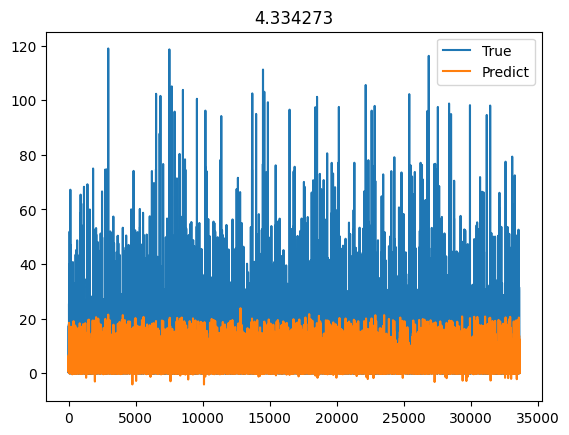

In [ ]:
mae=tf.keras.losses.MeanAbsoluteError()
yt=y_test
yt=yt.reshape(-1)
ye=clf.predict(X_test)
ye=ye.reshape(-1)
plt.plot(yt)
plt.plot(ye)
plt.legend(['True','Predict'])
plt.title(str(mae(yt,ye).numpy()))#0.00027408
plt.show()


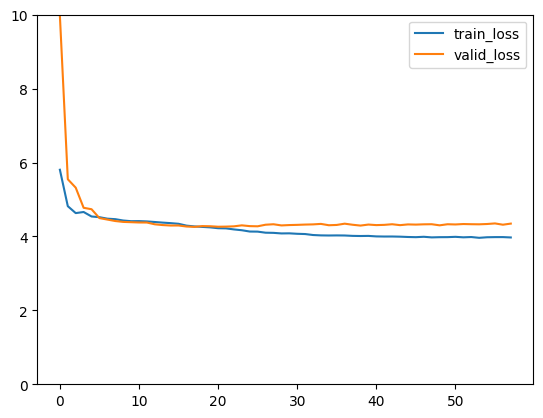

In [ ]:
import matplotlib.pyplot as plt
# plot losses
plt.plot(clf.history['loss'])
# plot accuracy
plt.plot(clf.history['valid_mae'])
plt.legend(['train_loss','valid_loss'])
plt.ylim(0,10)
plt.show()
#plt.plot(clf.history['valid_mse'])


<Axes: title={'center': 'Global Feature Importances'}>

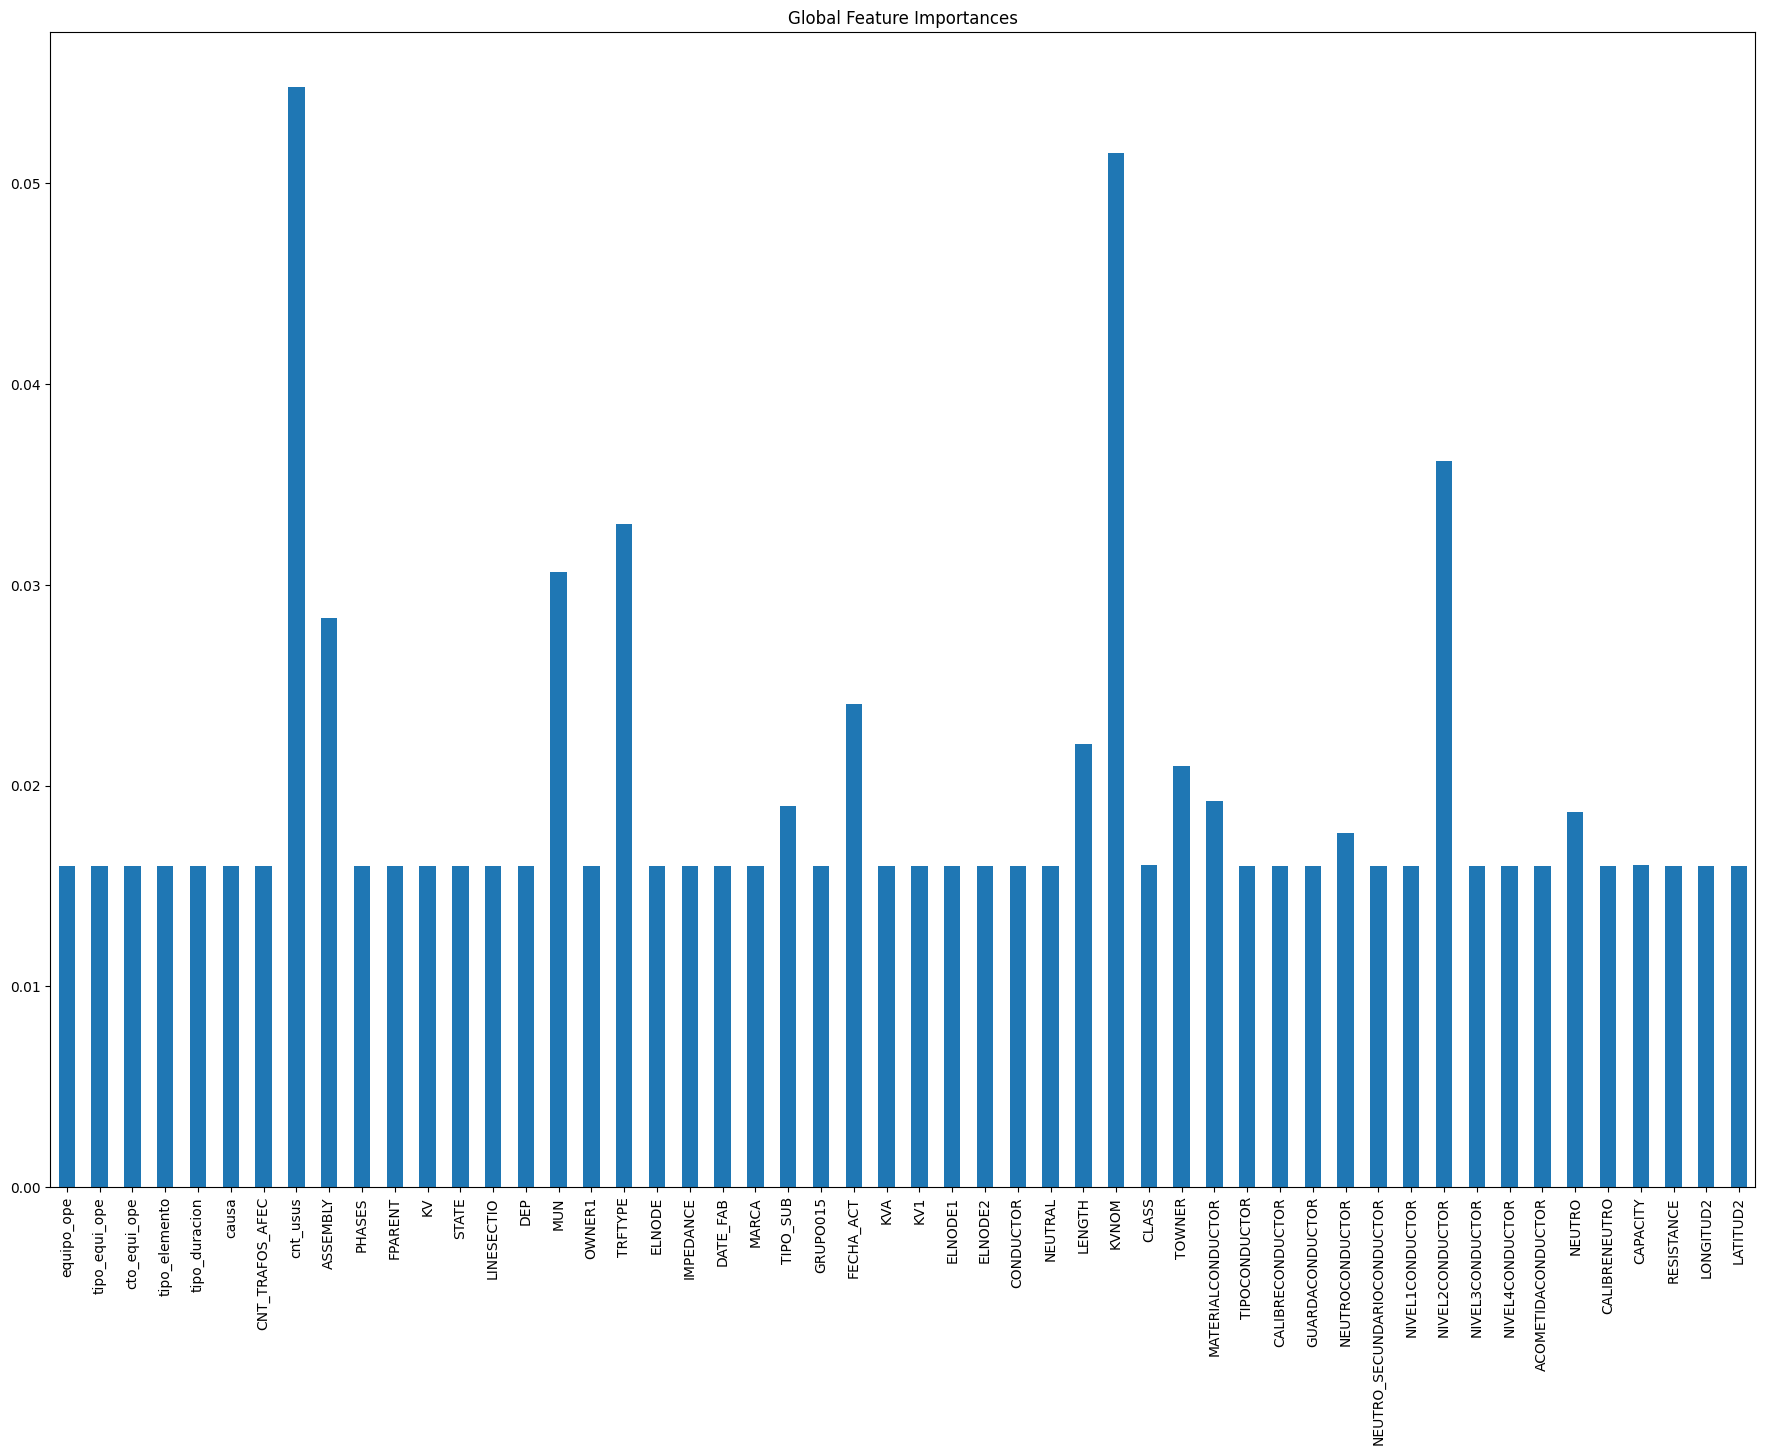

In [ ]:
plt.figure(figsize=(22, 15))
pd.Series(clf.feature_importances_, index=df.columns).plot.bar(title='Global Feature Importances')


Iteración  0 : 

Early stopping occurred at epoch 99 with best_epoch = 79 and best_valid_mae = 5.077579975128174
Test accuracy for lambda_sparse 1e-15: 4.8008


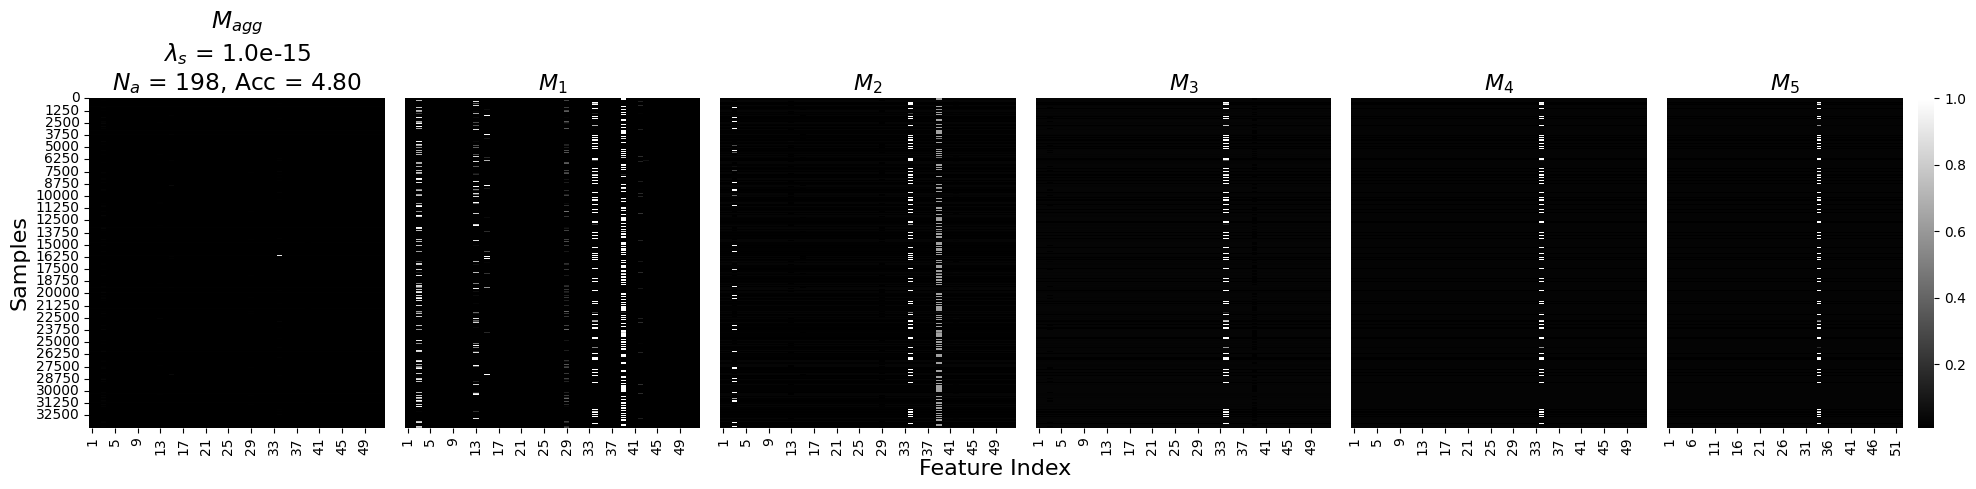

Iteración  1 : 
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_valid_mae = 5.059549808502197
Test accuracy for lambda_sparse 1e-10: 4.7850


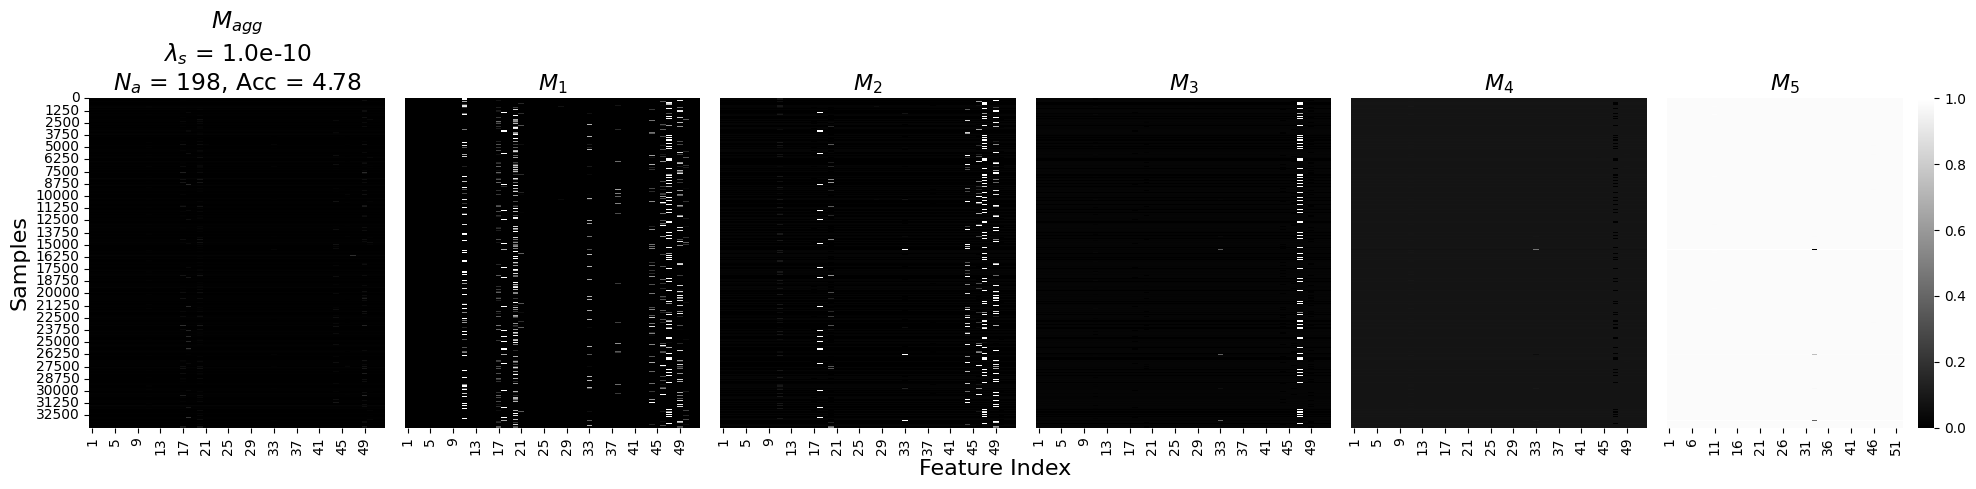

Iteración  2 : 
Stop training because you reached max_epochs = 100 with best_epoch = 88 and best_valid_mae = 5.034609794616699
Test accuracy for lambda_sparse 1e-06: 4.7363


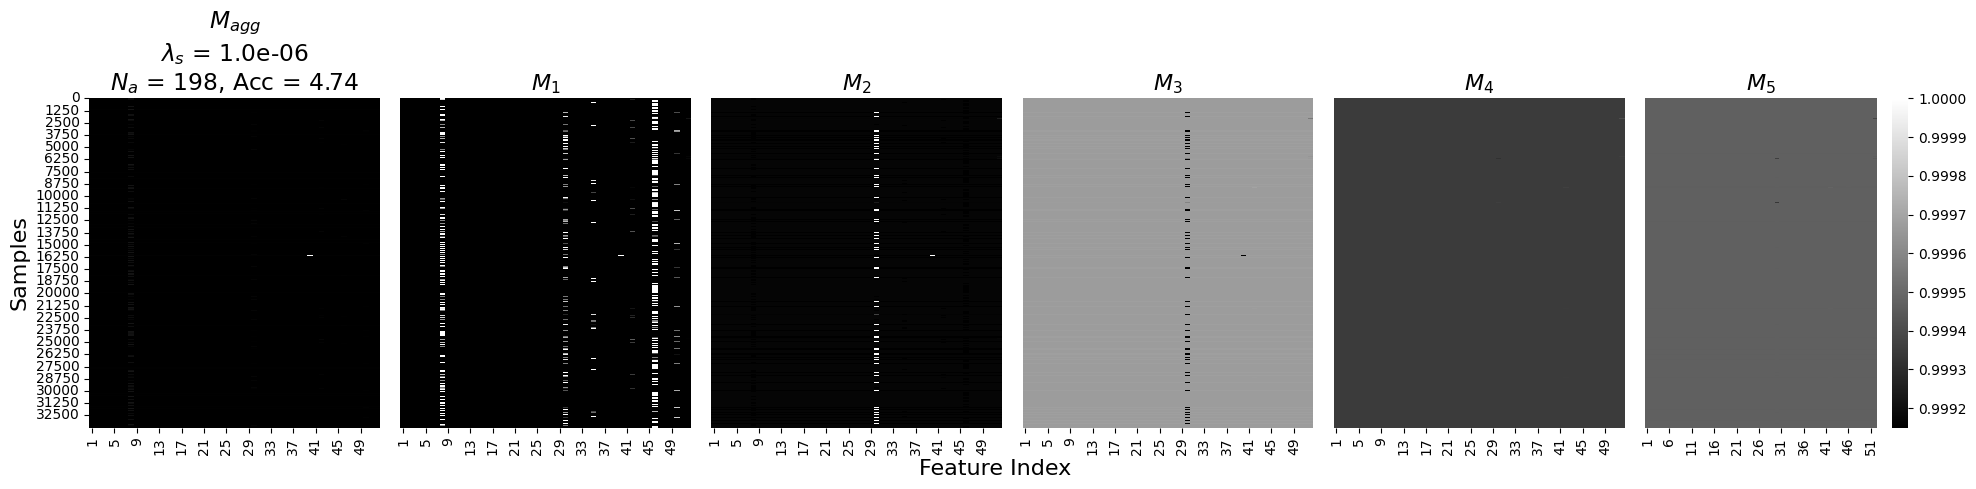

Iteración  3 : 

Early stopping occurred at epoch 86 with best_epoch = 66 and best_valid_mae = 5.012790203094482
Test accuracy for lambda_sparse 0.001: 4.7464


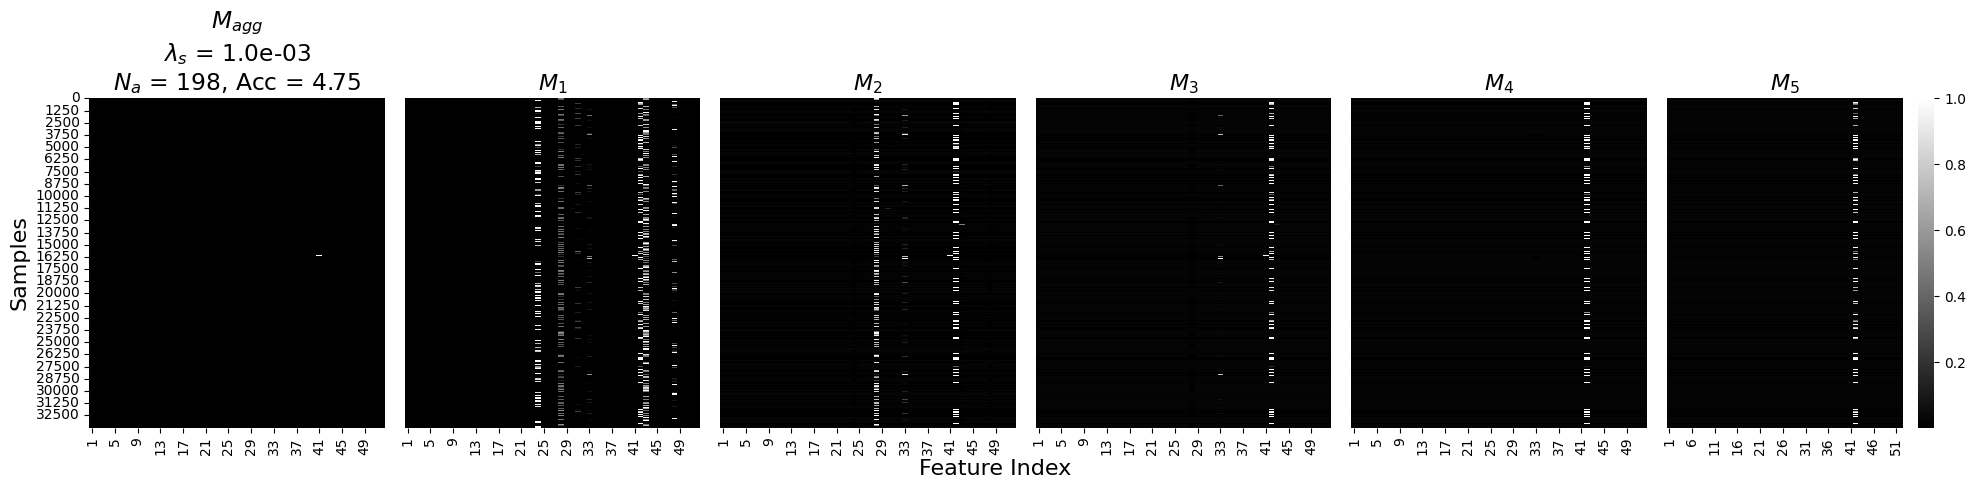

Iteración  4 : 

Early stopping occurred at epoch 76 with best_epoch = 56 and best_valid_mae = 5.063799858093262
Test accuracy for lambda_sparse 0.01: 4.7854


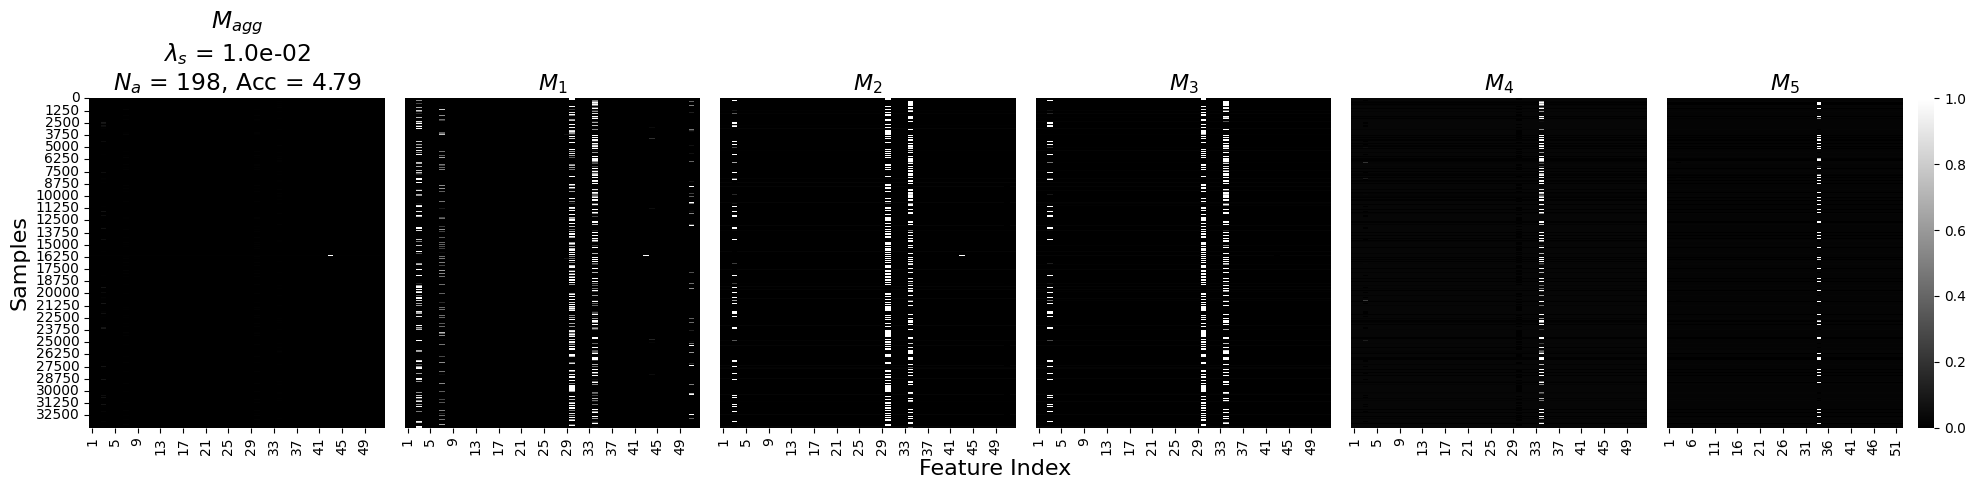

Iteración  5 : 

Early stopping occurred at epoch 90 with best_epoch = 70 and best_valid_mae = 5.066679954528809
Test accuracy for lambda_sparse 0.1: 4.7865


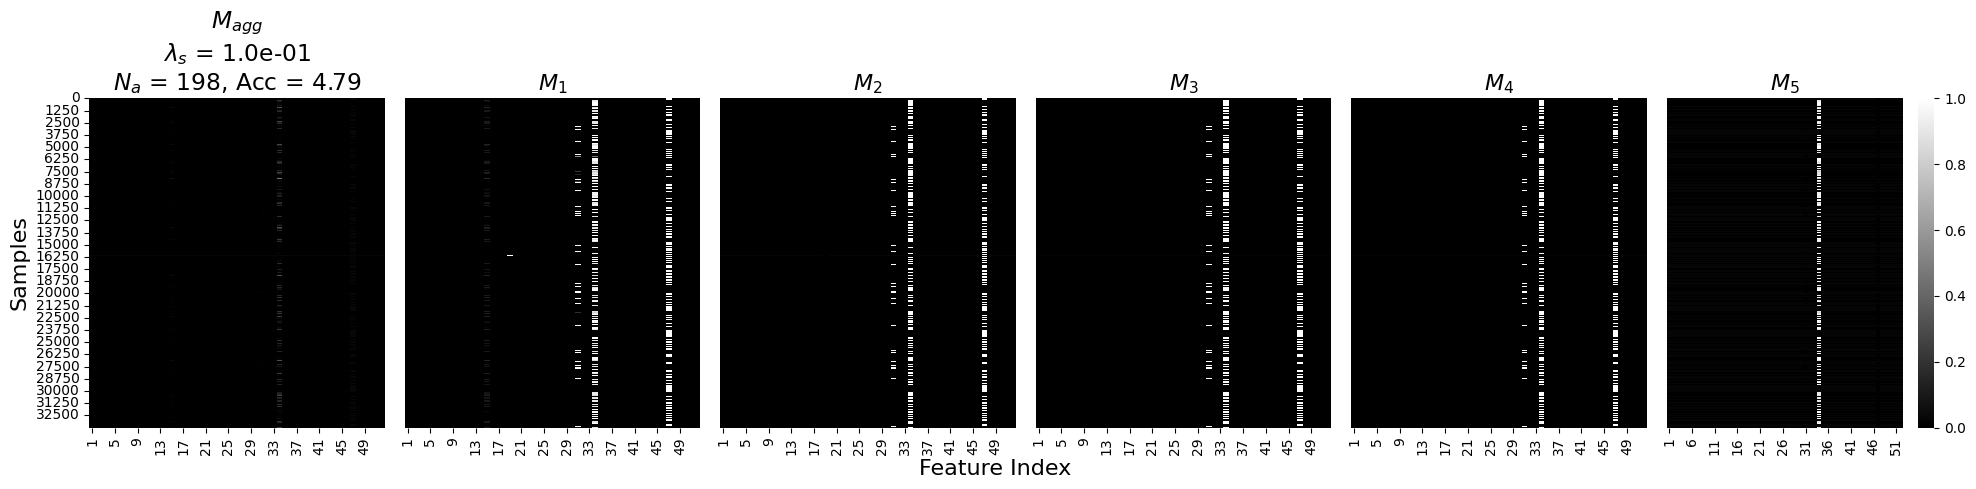

Iteración  6 : 

Early stopping occurred at epoch 45 with best_epoch = 25 and best_valid_mae = 6.606269836425781
Test accuracy for lambda_sparse 1: 6.4547


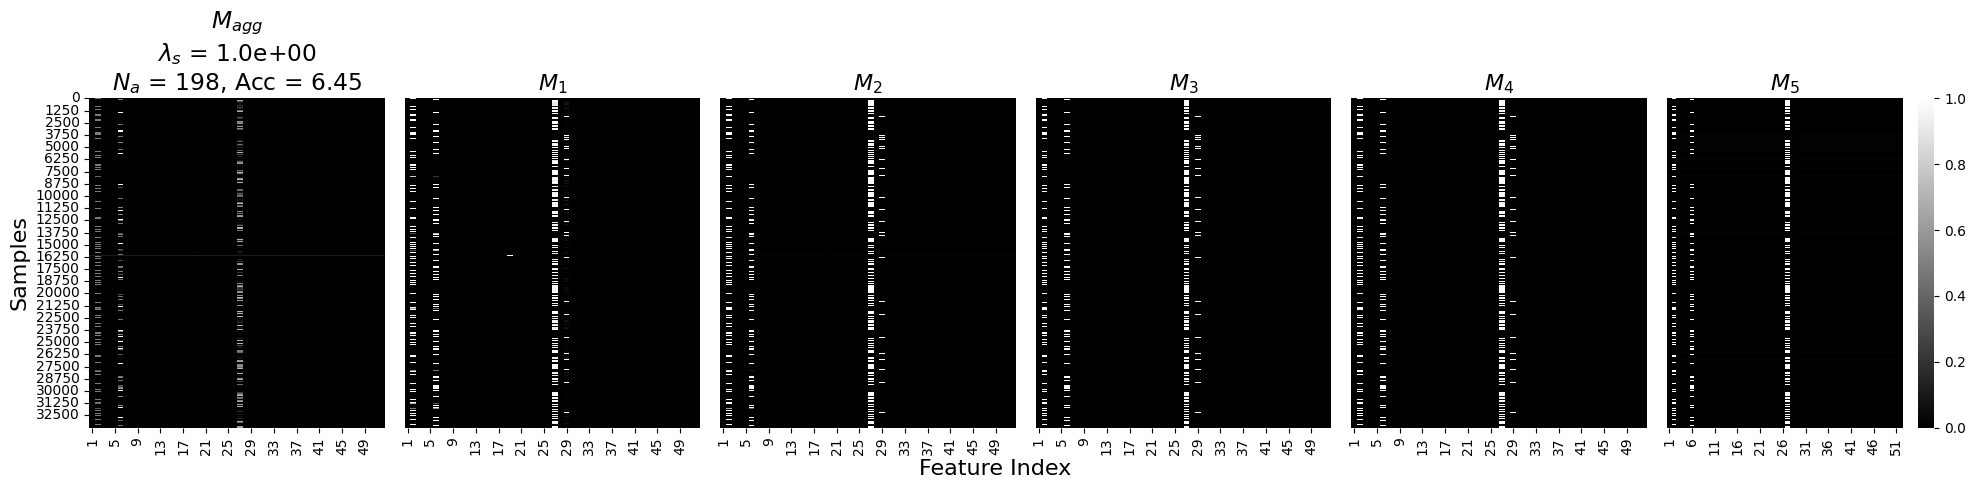

Iteración  7 : 

Early stopping occurred at epoch 61 with best_epoch = 41 and best_valid_mae = 6.700900077819824
Test accuracy for lambda_sparse 2: 6.5571


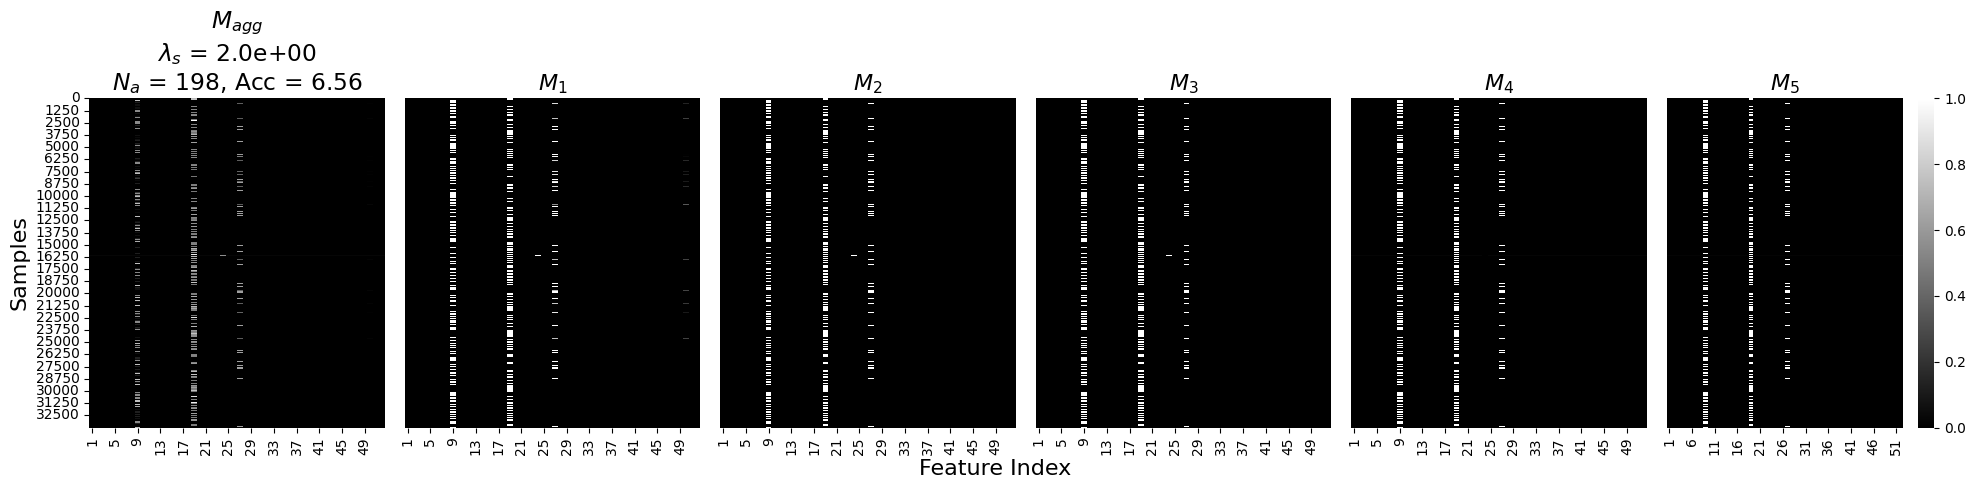

<ipython-input-11-05570cc4d794>:146: RuntimeWarning: invalid value encountered in divide
  median_mask = median_masks_per_step[i] / median_masks_per_step[i].max()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


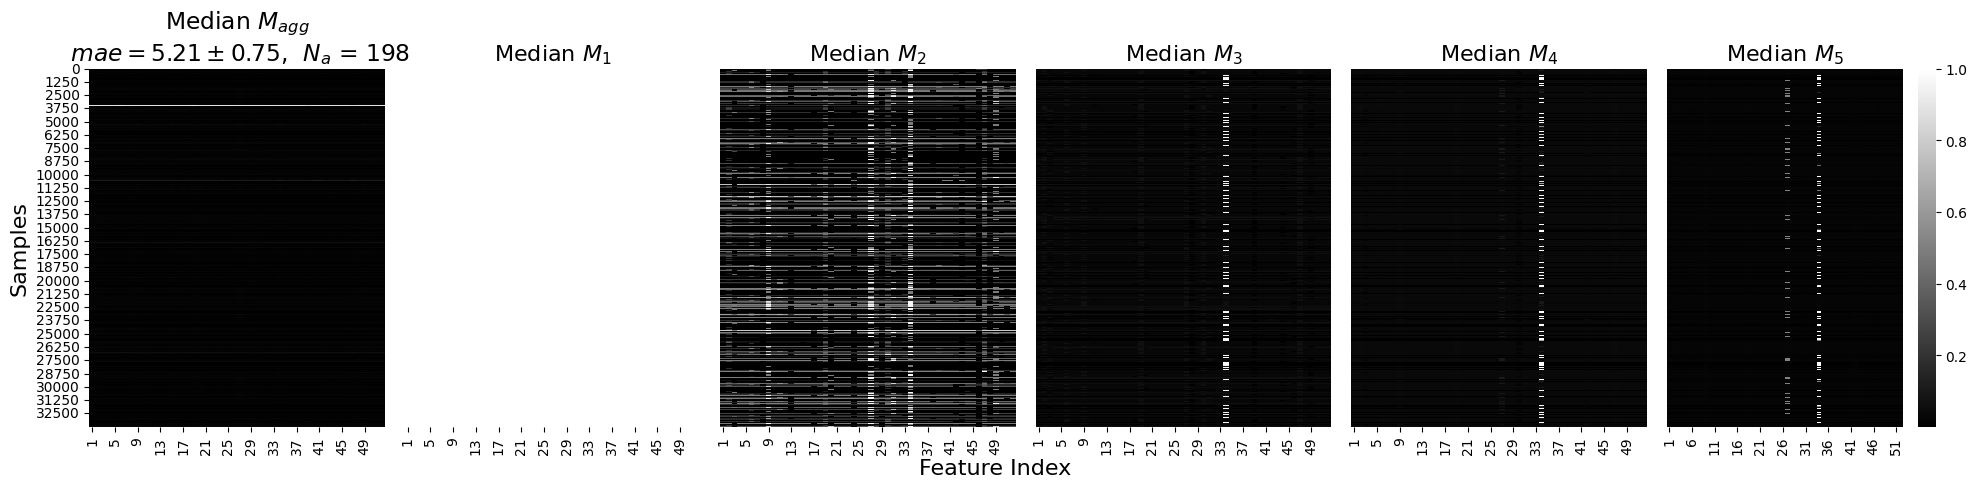

Median accuracy across all lambda_sparse values: 5.2065


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
study_class = {
    "n_d": 121,
    "n_a": 198,
    "n_steps": 5,
    "gamma": 4.297787517235077e-08,
    "lambda_sparse": 1.2722075655785514e-07,
    "batch_size": 4096,
    "p": 0.6783540155045026,
    "mask_type": "sparsemax"
}
# Create output directory if it doesn't exist
# Create output directory name by including parameter values
n_d=study_class['n_d']
n_a=study_class['n_a']
n_steps=study_class['n_steps']
gamma=study_class['gamma']
lambda_sparse=study_class['lambda_sparse']
mask_type=study_class['mask_type']
batch_size=study_class['batch_size']
output_dir = "results_"+ f"_n_a_{n_a}_steps_{n_steps}_gamma_{gamma}_BatchSize_{batch_size}"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

latex_font_size = 24  # Change this to your LaTeX document font size
target_font_size = latex_font_size * 0.7  # 70% of the LaTeX font size

# Generate lambda_sparse values
lambda_values = [1e-15, 1e-10, 1e-6, 1e-3, 1e-2, 1e-1, 1, 2]
features = list(range(1, X_valid.shape[1] + 1))

# Lists to store explain matrices, masks, and accuracies for each iteration
explain_matrices_list = []
masks_list_per_step = [[] for _ in range(n_steps)]
accuracies = []

# Loop through lambda_sparse values
for idx, lambda_sparse in enumerate(lambda_values):
    # Train the classifier with each lambda_sparse value
    print('Iteración ',idx,': ')
    clf = TabNetRegressor(
        n_d=n_d, n_a=n_a, n_steps=n_steps,
        lambda_sparse=lambda_sparse, mask_type=mask_type, gamma=gamma,
        cat_idxs=[],
        cat_dims=[],
        cat_emb_dim=[], verbose=False
    )

    clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['mae'],
    loss_fn=my_mae_loss_fn,
    max_epochs=100,
    patience=20,
    batch_size=batch_size, virtual_batch_size=batch_size//2,
    num_workers=0,
    drop_last=False,
)

    # Generate explain_matrix and masks
    explain_matrix, masks = clf.explain(X_test)

    # Calculate accuracy for X_test
    y_pred = clf.predict(X_test)

    mae=tf.keras.losses.MeanAbsoluteError()
    yt=y_test
    yt=yt.reshape(-1)
    ye=clf.predict(X_test)
    ye=ye.reshape(-1)
    test_accuracy = mae(yt,ye)
    accuracies.append(test_accuracy)

    # Print test accuracy for this iteration
    print(f"Test accuracy for lambda_sparse {lambda_sparse}: {test_accuracy:.4f}")

    # Create subplots with 1 row and (steps_len + 1) columns
    fig, axs = plt.subplots(1, n_steps + 1, figsize=(20, 5))

    # Plot the explain matrix in the first column
    explain_matrix_norm = explain_matrix / explain_matrix.max()  # Normalize the explain matrix
    sns.heatmap(pd.DataFrame(explain_matrix_norm, columns=features), cmap="gray", ax=axs[0], cbar=False)
    axs[0].set_title("$M_{agg}$\n" + r"$\lambda_s$ = {:.1e}".format(lambda_sparse)+"\n"+ r"$N_a$ = {}, Acc = {:.2f}".format(n_a, test_accuracy), fontsize=target_font_size)
    axs[0].set_ylabel("Samples", fontsize=16)

    # Plot each mask in the subsequent columns
    for i in range(n_steps):
        masks[i] /= masks[i].max()  # Normalize each mask
        sns.heatmap(pd.DataFrame(masks[i], columns=features), cmap="gray", ax=axs[i + 1], cbar=(i == n_steps - 1))
        axs[i + 1].set_title(f"$M_{{{i + 1}}}$", fontsize=16)
        axs[i + 1].set_yticklabels([])
        axs[i + 1].set_ylabel("")
        axs[i + 1].tick_params(left=False)

    # Add a centered x-axis label for all subplots
    fig.text(0.5, 0.04, 'Feature Index', ha='center', fontsize=16)

    # Adjust layout and save the figure
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    save_path = os.path.join(output_dir, f"combined_explain_matrix_and_masks_{idx}.png")
    plt.savefig(save_path, dpi=300)
    plt.show()
    plt.close(fig)

    # Store the results in lists
    explain_matrices_list.append(explain_matrix)
    for i in range(n_steps):
        masks_list_per_step[i].append(masks[i])

# Calculate the median explain matrix, masks, and accuracy across all iterations
median_explain_matrix = np.median(np.array(explain_matrices_list), axis=0)
median_accuracy = np.mean(np.array(accuracies))
std_accuracy = np.std(np.array(accuracies))
median_masks_per_step = []
for i in range(n_steps):
    mask_array = np.array(masks_list_per_step[i])  # Shape: (iterations, samples, features)
    median_mask = np.median(mask_array, axis=0)
    median_masks_per_step.append(median_mask)

# Plot the median explain matrix
fig, axs = plt.subplots(1, n_steps + 1, figsize=(20, 5))

# Plot the median explain matrix in the first column
median_explain_matrix /= median_explain_matrix.max()  # Normalize the explain matrix
sns.heatmap(pd.DataFrame(median_explain_matrix, columns=features), cmap="gray", ax=axs[0], cbar=False)
#axs[0].set_title("Median $M_{agg}$\n "+ r"$Acc = {:.2f} ± {std_accuracy:.2f}$,  $N_a$ = {}".format(median_accuracy, n_a), fontsize=target_font_size)
axs[0].set_title(
    "Median $M_{agg}$\n " + r"$mae = {:.2f} \pm {:.2f}$,  $N_a$ = {}".format(
        median_accuracy, std_accuracy, n_a
    ),
    fontsize=target_font_size
)

axs[0].set_ylabel("Samples", fontsize=16)

# Plot each median mask in the subsequent columns
for i in range(n_steps):
    median_mask = median_masks_per_step[i] / median_masks_per_step[i].max()
    sns.heatmap(pd.DataFrame(median_mask, columns=features), cmap="gray", ax=axs[i + 1], cbar=(i == n_steps - 1))
    axs[i + 1].set_title(f"Median $M_{{{i + 1}}}$", fontsize=16)
    axs[i + 1].set_yticklabels([])
    axs[i + 1].set_ylabel("")
    axs[i + 1].tick_params(left=False)

# Add a centered x-axis label for all subplots
fig.text(0.5, 0.04, 'Feature Index', ha='center', fontsize=16)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0.05, 1, 1])
save_path = os.path.join(output_dir, "Median_explain_matrix_and_masks.png")
plt.savefig(save_path, dpi=300)
plt.show()
plt.close(fig)

print(f"Median accuracy across all lambda_sparse values: {median_accuracy:.4f}")


#Criticidad

In [ ]:
explain_matrix_df=pd.read_csv('/content/drive/MyDrive/Doctorado/explain_matrix.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Cargar datos
Xdata = pd.read_csv('/content/drive/MyDrive/Doctorado/Tabla_General.csv')
df = Xdata.copy()

# Asegúrate de que 'FECHA' esté en formato de fecha
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Crear los widgets de selección con la opción "Todos"
def crear_widgets():
    dep_options = ["Todos"] + list(df['DEP'].unique())
    dep_select = widgets.Dropdown(options=dep_options, description='Departamento')

    mun_select = widgets.Dropdown(description='Municipio')
    tipo_elemento_options = ["Todos"] + list(df['tipo_elemento'].unique())
    tipo_elemento_select = widgets.Dropdown(options=tipo_elemento_options, description='Tipo Elemento')

    tipo_equi_ope_options = ["Todos"] + list(df['tipo_equi_ope'].unique())
    tipo_equi_ope_select = widgets.Dropdown(options=tipo_equi_ope_options, description='Tipo Equi Ope')

    fecha_inicio = widgets.DatePicker(description='Fecha Inicio')
    fecha_fin = widgets.DatePicker(description='Fecha Fin')

    return dep_select, mun_select, tipo_elemento_select, tipo_equi_ope_select, fecha_inicio, fecha_fin

dep_select_1, mun_select_1, tipo_elemento_select_1, tipo_equi_ope_select_1, fecha_inicio_1, fecha_fin_1 = crear_widgets()
dep_select_2, mun_select_2, tipo_elemento_select_2, tipo_equi_ope_select_2, fecha_inicio_2, fecha_fin_2 = crear_widgets()

# Función para actualizar los municipios basados en el departamento seleccionado
def actualizar_municipios(dep, mun_widget):
    if dep == "Todos":
        municipios = ["Todos"] + list(df['MUN'].unique())
    else:
        municipios = ["Todos"] + list(df[df['DEP'] == dep]['MUN'].unique())
    mun_widget.options = municipios

# Asignar la actualización dinámica de municipios a los selectores
dep_select_1.observe(lambda change: actualizar_municipios(change.new, mun_select_1), names='value')
dep_select_2.observe(lambda change: actualizar_municipios(change.new, mun_select_2), names='value')

# Función de filtrado y graficado
def filtrar_y_graficar(dep, mun, tipo_elemento, tipo_equi_ope, inicio, fin):
    filtro = pd.Series([True] * len(df), index=df.index)

    if dep != "Todos":
        filtro &= df['DEP'] == dep
    if mun != "Todos":
        filtro &= df['MUN'] == mun
    if tipo_elemento != "Todos":
        filtro &= df['tipo_elemento'] == tipo_elemento
    if tipo_equi_ope != "Todos":
        filtro &= df['tipo_equi_ope'] == tipo_equi_ope
    if inicio:
        filtro &= df['FECHA'] >= pd.to_datetime(inicio)
    if fin:
        filtro &= df['FECHA'] <= pd.to_datetime(fin)

    indices_filtrados = df.index[filtro].tolist()
    mean_values = explain_matrix_df.loc[indices_filtrados].mean()

    df_mean = pd.DataFrame(list(mean_values.items()), columns=['Variable', 'Mean'])
    return df_mean

def mostrar_graficos(dep1, mun1, tipo_elemento1, tipo_equi_ope1, inicio1, fin1,
                      dep2, mun2, tipo_elemento2, tipo_equi_ope2, inicio2, fin2):
    df1 = filtrar_y_graficar(dep1, mun1, tipo_elemento1, tipo_equi_ope1, inicio1, fin1)
    df2 = filtrar_y_graficar(dep2, mun2, tipo_elemento2, tipo_equi_ope2, inicio2, fin2)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico 1
    axes[0].bar(df1['Variable'], df1['Mean'], color='blue', alpha=0.7)
    axes[0].set_title('Filtro 1', fontsize=14)
    axes[0].set_xlabel('Variable', fontsize=12)
    axes[0].set_ylabel('Mean Value', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Gráfico 2
    axes[1].bar(df2['Variable'], df2['Mean'], color='green', alpha=0.7)
    axes[1].set_title('Filtro 2', fontsize=14)
    axes[1].set_xlabel('Variable', fontsize=12)
    axes[1].set_ylabel('Mean Value', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Conectar los widgets a la función de comparación
output = widgets.interactive_output(
    mostrar_graficos,
    {
        'dep1': dep_select_1, 'mun1': mun_select_1, 'tipo_elemento1': tipo_elemento_select_1,
        'tipo_equi_ope1': tipo_equi_ope_select_1, 'inicio1': fecha_inicio_1, 'fin1': fecha_fin_1,
        'dep2': dep_select_2, 'mun2': mun_select_2, 'tipo_elemento2': tipo_elemento_select_2,
        'tipo_equi_ope2': tipo_equi_ope_select_2, 'inicio2': fecha_inicio_2, 'fin2': fecha_fin_2,
    }
)

# Mostrar widgets de forma vertical, uno al lado del otro
box_1 = widgets.VBox([dep_select_1, mun_select_1, tipo_elemento_select_1, tipo_equi_ope_select_1, fecha_inicio_1, fecha_fin_1])
box_2 = widgets.VBox([dep_select_2, mun_select_2, tipo_elemento_select_2, tipo_equi_ope_select_2, fecha_inicio_2, fecha_fin_2])

display(widgets.HBox([box_1, box_2]))
display(output)


Output()